## Project 2 Starting Over
Jacob Minkin
Last project I tried to predict a critical violation from location and cuisine. The problem is that almost all restaurants have at least one critical violation which made it hard to get any predictive value from the model. Now I want to try again with predicting the score and therefore grade of the restaurant

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.impute import KNNImputer
sns.set_style('darkgrid')

#Import Data
df = pd.read_csv('../data/Inspection.csv')
df['date'] = pd.to_datetime(df['INSPECTION DATE'])
df = df[df.BORO == 'Manhattan']

## Find most recent score for every restaurant

In [8]:
df.sort_values(['date'], ascending=False, inplace= True)
df_recent = df.groupby(['CAMIS'], sort=False).first()

<AxesSubplot:>

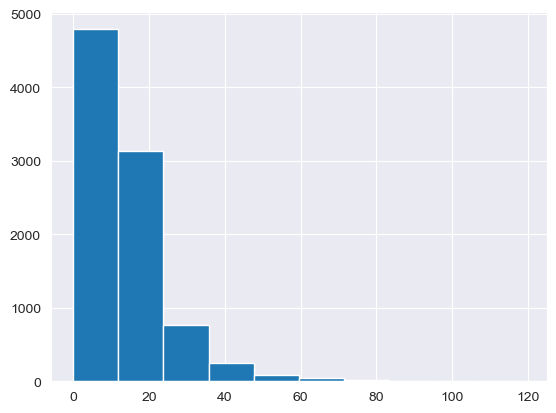

In [10]:
df_recent.SCORE.hist()


In [45]:
df_recent[df_recent.ACTION == 'No violations were recorded at the time of this inspection.']

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
CAMIS,,,,,,,,,,,,,,,,,,,,,
41267566,SMITH & MILLS,Manhattan,71,NORTH MOORE STREET,10013.0,2122262515,American,2/9/2023,No violations were recorded at the time of thi...,None,...,1002123.0,1.001880e+09,MN24,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09
50111280,PLANTSHED COFFEE BAR,Manhattan,723,AMSTERDAM AVENUE,10025.0,2126624400,Coffee/Tea,2/9/2023,No violations were recorded at the time of thi...,06C,...,1032587.0,1.012268e+09,MN12,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09
50080435,FULKOLE RESTAURANT,Brooklyn,1211,LIBERTY AVENUE,11208.0,9173536405,Bangladeshi,2/9/2023,No violations were recorded at the time of thi...,02H,...,3094137.0,3.041840e+09,BK83,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09
40535738,NEIL SIMON THEATRE,Manhattan,250,WEST 52 STREET,10019.0,2123544624,American,2/8/2023,No violations were recorded at the time of thi...,None,...,1024820.0,1.010230e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-08
50130587,ST. FRANCIS COLLEGE,Brooklyn,179,LIVINGSTON ST,11201.0,7184092070,American,2/6/2023,No violations were recorded at the time of thi...,None,...,NaN,3.000000e+00,BK38,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50002422,TAGLIERE,Queens,None,JFK INTERNATIONAL AIRPORT,11430.0,6464835087,Pizza,5/16/2019,No violations were recorded at the time of thi...,10F,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-16
41534086,LA PIZZA & CONVENIENCE,Brooklyn,887,MANHATTAN AVENUE,11222.0,7183830666,Pizza,5/1/2019,No violations were recorded at the time of thi...,22C,...,3064834.0,3.025630e+09,BK76,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-01
40483596,GERSHWIN THEATRE,Manhattan,222,WEST 51 STREET,10019.0,2123544624,Other,10/23/2018,No violations were recorded at the time of thi...,20D,...,1024812.0,1.010220e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-23


In [58]:
df[['CAMIS','GRADE','SCORE', 'date']].loc[df.DBA == 'LA PIZZA & CONVENIENCE']

,CAMIS,GRADE,SCORE,date
142464,41534086,NaN,NaN,2019-05-01
24100,41534086,A,11.0,2019-05-01
201875,41534086,A,11.0,2019-05-01
3170,41534086,A,11.0,2019-05-01
77494,41534086,A,13.0,2018-12-18
11567,41534086,A,13.0,2018-12-18
99483,41534086,A,13.0,2018-12-18
111741,41534086,NaN,30.0,2018-11-28
34686,41534086,NaN,30.0,2018-11-28
115965,41534086,NaN,30.0,2018-11-28


In [60]:
df_recent[['GRADE','SCORE', 'date']].loc[df_recent.DBA == 'LA PIZZA & CONVENIENCE']

,GRADE,SCORE,date
CAMIS,,,
41534086,A,11.0,2019-05-01


In [63]:
df_recent.DBA[df_recent.GRADE.isna()]

CAMIS
50094469                   REVOLVER
50131837              SQUARE COFFEE
50107767                       None
50109856        THE LATE NIGHT CAFE
50131536    MARRON PASTRY MANHATTAN
                     ...           
50119778                       None
50131312             167 PIZZA CAFE
50131515                       None
50123260        LITTLE NECK KITCHEN
50107551                     Zazzys
Name: DBA, Length: 4358, dtype: object

In [70]:
df_unranked = df[df['INSPECTION DATE'] == '1/1/1900']

In [74]:
df_recent = df_recent[df_recent['INSPECTION DATE'] != '1/1/1900']

<AxesSubplot:>

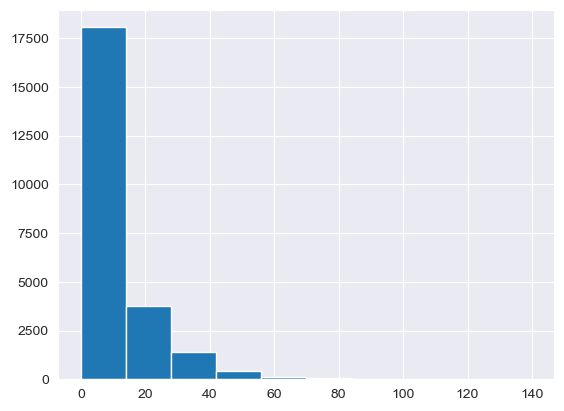

In [78]:
df_recent.SCORE.hist()

## Average Score for Boro

In [79]:
df_recent.groupby('BORO')['SCORE'].mean()

BORO
0                 7.600000
Bronx            13.941626
Brooklyn         13.301499
Manhattan        12.949240
Queens           13.814399
Staten Island    13.096559
Name: SCORE, dtype: float64

In [91]:
df_recent.BORO.sort_values()

CAMIS
50060598                0
50005134                0
50005059                0
40883586                0
50049804                0
                ...      
41305175    Staten Island
50101351    Staten Island
40807238    Staten Island
50108541    Staten Island
50002463    Staten Island
Name: BORO, Length: 23881, dtype: object

In [95]:
df[df.BORO == '0']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
133298,40883586,FLIK (American Express),0,200,VESEY STREET,10285.0,2126405562,American,11/1/2022,Violations were cited in the following area(s).,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-01
189952,50005059,FREEHOLD,0,45,S 3RD ST,11249.0,7183887591,American,5/25/2022,Violations were cited in the following area(s).,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25
91343,50005059,FREEHOLD,0,45,S 3RD ST,11249.0,7183887591,American,5/25/2022,Violations were cited in the following area(s).,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25
31020,50005059,FREEHOLD,0,45,S 3RD ST,11249.0,7183887591,American,5/25/2022,Violations were cited in the following area(s).,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25
52218,50060598,POKEWORKS (Entrance is on 41st street between ...,0,122,E 42ND ST,10168.0,6466539793,Hawaiian,4/4/2022,Violations were cited in the following area(s).,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110831,50125174,NaN,0,NaN,NaN,NaN,9177053204,NaN,1/1/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01
1018,50123437,NaN,0,274,ATLANTIC AVE,11518.0,9176809065,NaN,1/1/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01
116663,50112993,NaN,0,NaN,NaN,NaN,72283779,NaN,1/1/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01
118094,50115150,NaN,0,NaN,NaN,NaN,3473618178,NaN,1/1/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01


## Finding a resteraunt as a proxy for exploratory analysis

In [14]:
STARBUCKS = df['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df[STARBUCKS]
Sbucks = df[df.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS.CUISINE.value_counts()

Coffee/Tea    953
Name: CUISINE, dtype: int64

<AxesSubplot:>

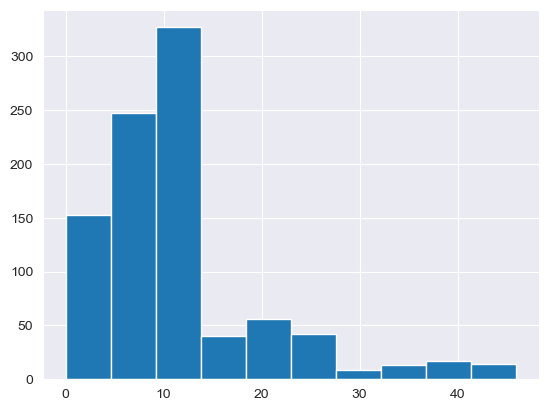

In [16]:
STARBUCKS.SCORE.hist()

<AxesSubplot:>

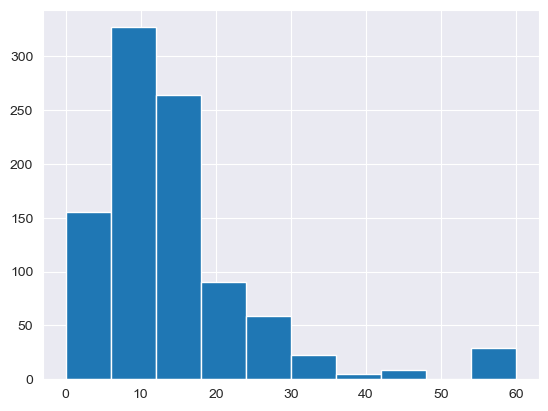

In [20]:
Dunkin = df['DBA'].str.contains('DUNKIN', regex=False, na=False)
Dunkin = df[Dunkin]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
Dunkin.SCORE.hist()


<AxesSubplot:>

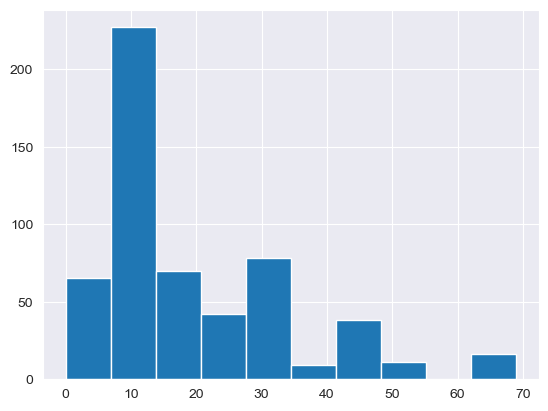

In [26]:
SUBWAY = df['DBA'].str.contains("SUBWAY", regex=False, na=False)
SUBWAY = df[SUBWAY]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
SUBWAY.SCORE.hist()

<AxesSubplot:>

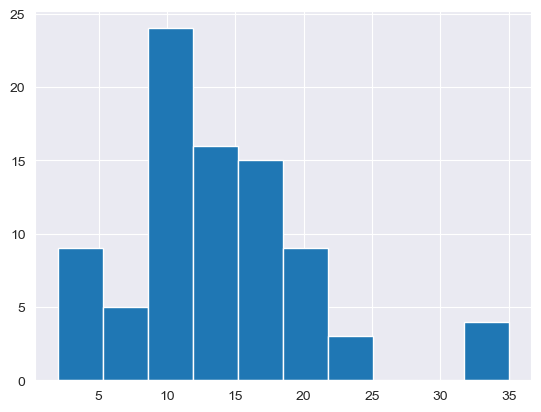

In [28]:
SUBWAY = df['DBA'].str.contains("BURGER KING", regex=False, na=False)
SUBWAY = df[SUBWAY]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
SUBWAY.SCORE.hist()

## Breakdown of score by cuisine

In [37]:
df_recent.groupby('CUISINE')['SCORE'].mean().sort_values(ascending=False).head(15)


CUISINE
New French           40.000000
Californian          23.500000
English              20.888889
Pancakes/Waffles     19.600000
Chinese/Japanese     19.250000
Southeast Asian      18.343750
Moroccan             18.250000
Basque               18.000000
Fruits/Vegetables    17.666667
African              17.650000
Indian               17.236220
Latin American       17.155280
Russian              17.000000
Vegan                16.945946
Peruvian             16.866667
Name: SCORE, dtype: float64

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
180842,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,12/1/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01
133587,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,12/1/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01
177630,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,12/1/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01
7374,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,12/1/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01
199842,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,12/1/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01
162628,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,12/1/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-01
50961,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,6/23/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-23
117062,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,6/23/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-23
64449,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,6/23/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-23
51943,50047580,VERSA,Manhattan,218,WEST 35 STREET,10001.0,6468502850,Californian,6/23/2022,Violations were cited in the following area(s).,...,1014413.0,1.007840e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-23


## Its Starbucks Time!!

In [1]:
STARBUCKS.info()

NameError: name 'STARBUCKS' is not defined